# Analysis of Network

There area several ways to analyze the structural features of Network in terms of its size, density, topology, and statistical properties. 
Lets investiage some of these measures below:

In [16]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import random
from matplotlib.cm import ScalarMappable

## 1: Size & Density:

The concept is very similar to mass and compostion of matter, meaning its gives us the information of the quatity of stuff without providing any detial of its organization. 
Such an analysis of network comes handy while comparing multiple networks, for example we can compare two netowrks of same size and density inorder to compare other properties.


Density of a graph is calculated by the formula :

$$ ρ(G) = 2m / n(n - 1)$$ 

for an undirected graph.
Where 'm' is the number of edges and 'n' is the number of nodes.

In [2]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the number of nodes (n) and edges (m)
num_nodes = G.number_of_nodes() # n
num_edges = G.number_of_edges() # m

# Compute the density (ρ) for an undirected graph
density = nx.density(G)

# Print the results
print("Number of Nodes: ", num_nodes)
print("Number of Edges: ", num_edges)
print("Density: ", density)


Number of Nodes:  34
Number of Edges:  78
Density:  0.13903743315508021


**Note**: The size and density of a network don't reveal much about its layout. For instance, two networks with different layouts can have the same density. However, size and density can provide insights into **network percolation**, which determines if the nodes are well-connected enough to form a visible giant component on a larger scale.

**Network Percolation**:
Erdos-Rényi random graphs, also known as binomial graphs, are generated by connecting nodes randomly. Each edge is included in the graph with a probability p independent from every other edge. In terms of ***percolation theory***, we're interested in the emergence of a giant component -- a connected subgraph that contains a significant fraction of the entire graph's nodes. Lets explore it !

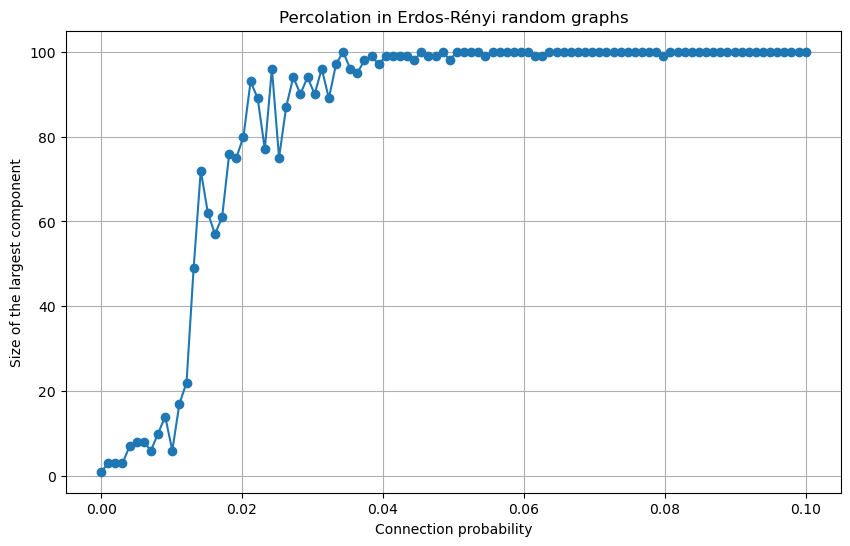

In [9]:
# Number of nodes
n = 100

# Range of connection probabilities
p_values = np.linspace(0, 0.1, 100)

# List to store sizes of the largest components
largest_cmp_sizes = []

for p in p_values:
    # Generate an Erdos-Rényi random graph
    G = nx.erdos_renyi_graph(n, p)

    # Compute the sizes of all connected components
    cmp_sizes = [len(c) for c in nx.connected_components(G)]

    # Find the size of the largest component and append to the list
    largest_cmp_sizes.append(max(cmp_sizes))

# Plot the size of the largest component as a function of the connection probability
plt.figure(figsize=(10,6))
plt.plot(p_values, largest_cmp_sizes, 'o-')
plt.xlabel('Connection probability')
plt.ylabel('Size of the largest component')
plt.title('Percolation in Erdos-Rényi random graphs')
plt.grid(True)
plt.show()


**Plot**: As the connection probability increases, we can observe a phase transition where the size of the largest component increases rapidly, illustrating the concept of percolation in the graph.

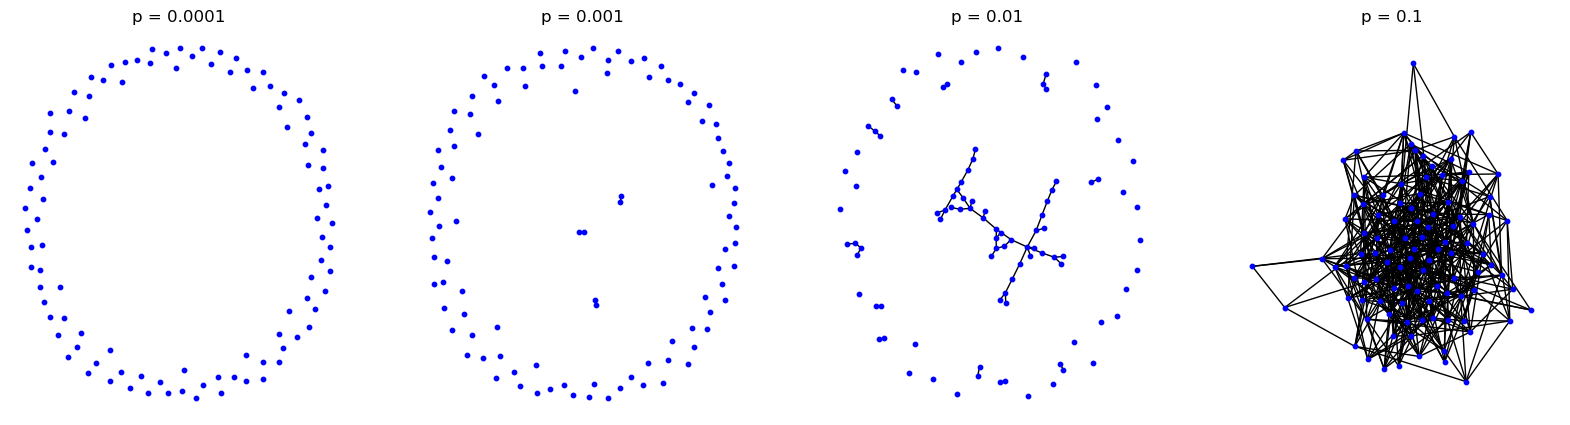

In [10]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Define the probabilities
p_values = [0.0001, 0.001, 0.01, 0.1]

# Number of nodes
n = 100

for i, p in enumerate(p_values):
    # Generate an Erdos-Rényi graph
    G = nx.erdos_renyi_graph(n, p)

    # Plot the graph
    nx.draw(G, ax=axs[i], node_size=10, node_color='blue')
    axs[i].set_title(f'p = {p}')

plt.show()

**Plote**: Each subplot shows a graph generated with a different connection probability, allowing us to visually compare the graph structures that result from different probabilities.

# 2: Shortest Path Length

In a network (or graph), the shortest path length between two nodes is the smallest number of edges that must be traversed in order to travel from one node to the other.



Shortest path between node 7 and node 23: [7, 2, 27, 23]


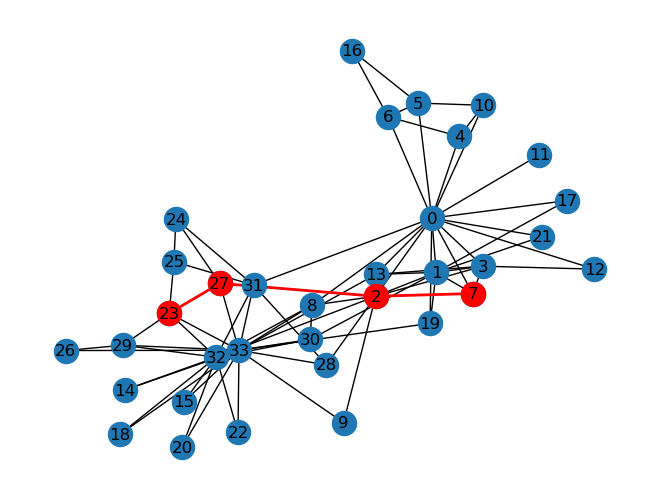

In [13]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Choose two random nodes
nodes = list(G.nodes())
node1, node2 = random.sample(nodes, 2)

# Compute the shortest path between the two nodes
shortest_path = nx.shortest_path(G, node1, node2)

# Print the shortest path
print(f"Shortest path between node {node1} and node {node2}: {shortest_path}")

# Draw the graph
pos = nx.spring_layout(G)  # Compute a layout for the graph
nx.draw(G, pos, with_labels=True)

# Highlight the shortest path
shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='r', width=2)

plt.show()


### Uses of "shortest path length":

lets use this "shortest path length" to define several useful metrics to characterize the network’s topological properties, such as:

- **Characteristic Path Length**: This is the average of the shortest path lengths for all pairs of nodes in the network. It represents the average separation between nodes in the network.

- **Eccentricity**: For a given node, the eccentricity is the maximum distance from that node to all other nodes in the network.

- **Diameter**: This is the maximum eccentricity of any node in the network. In other words, it's the length of the longest 'shortest path' between any two nodes.

- **Radius**: This is the minimum eccentricity of any node in the network. It represents the shortest 'longest path' from a node to all other nodes.

In [14]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Characteristic Path Length
avg_shortest_path_length = nx.average_shortest_path_length(G)
print("Characteristic Path Length: ", avg_shortest_path_length)

# Eccentricity (here we show the first 5 nodes for brevity)
eccentricity = nx.eccentricity(G)
print("Eccentricity (first 5 nodes): ", dict(list(eccentricity.items())[:5]))

# Diameter
diameter = nx.diameter(G)
print("Diameter: ", diameter)

# Radius
radius = nx.radius(G)
print("Radius: ", radius)


Characteristic Path Length:  2.408199643493761
Eccentricity (first 5 nodes):  {0: 3, 1: 3, 2: 3, 3: 3, 4: 4}
Diameter:  5
Radius:  3


These metrics can provide important insights into the topology of the network. For instance, the diameter and radius can indicate how 'spread out' the network is, while the characteristic path length can indicate how 'integrated' the network is.

Lets use ***nx.eccentricity*** function to compute the eccentricity of each node, and then use these values to set the node colors in the graph visualization.

C:\Users\ACHARYA Kishor\AppData\Local\Temp\ipykernel_12144\1939024768.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node Eccentricity')


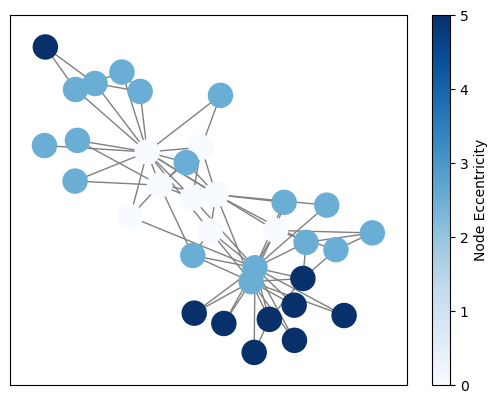

In [20]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the eccentricities of the nodes
eccentricity = nx.eccentricity(G)

# Normalize eccentricity values to range [0, 1] for color mapping
max_eccentricity = max(eccentricity.values())
normalized_eccentricities = [eccentricity[node] / max_eccentricity for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)  # Compute a layout for the graph
nodes = nx.draw_networkx_nodes(G, pos, node_color=normalized_eccentricities, cmap=plt.cm.Blues)
edges = nx.draw_networkx_edges(G, pos, edge_color='gray')

# Add a color bar legend
sm = ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=0, vmax=max_eccentricity))
sm.set_array([])
plt.colorbar(sm, label='Node Eccentricity')

plt.show()


**Plot**: In above visualization, nodes are colored according to their eccentricity. Nodes with higher eccentricity (i.e., further maximum distance to all other nodes) are darker.

# 3: Centralities and Coreness

### Centralities
Lets first explore some measurements of **node centralities**:

- **Degree Centrality**: Degree centrality of a node is simply the number of connections that it has. In NetworkX, we normalize it by the maximum possible degree in a simple graph i.e. n-1 where n is the number of nodes in G.


- **Betweenness Centrality**: Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v. It represents the amount of control that this node exerts over the interactions of other nodes in the network.


- **Closeness Centrality**: Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all other nodes. Thus, the more central a node is, the closer it is to all other nodes.


- **Eigenvector Centrality**: Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is essentially the i-th element of the principal eigenvector of the adjacency matrix.


- **PageRank**: PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

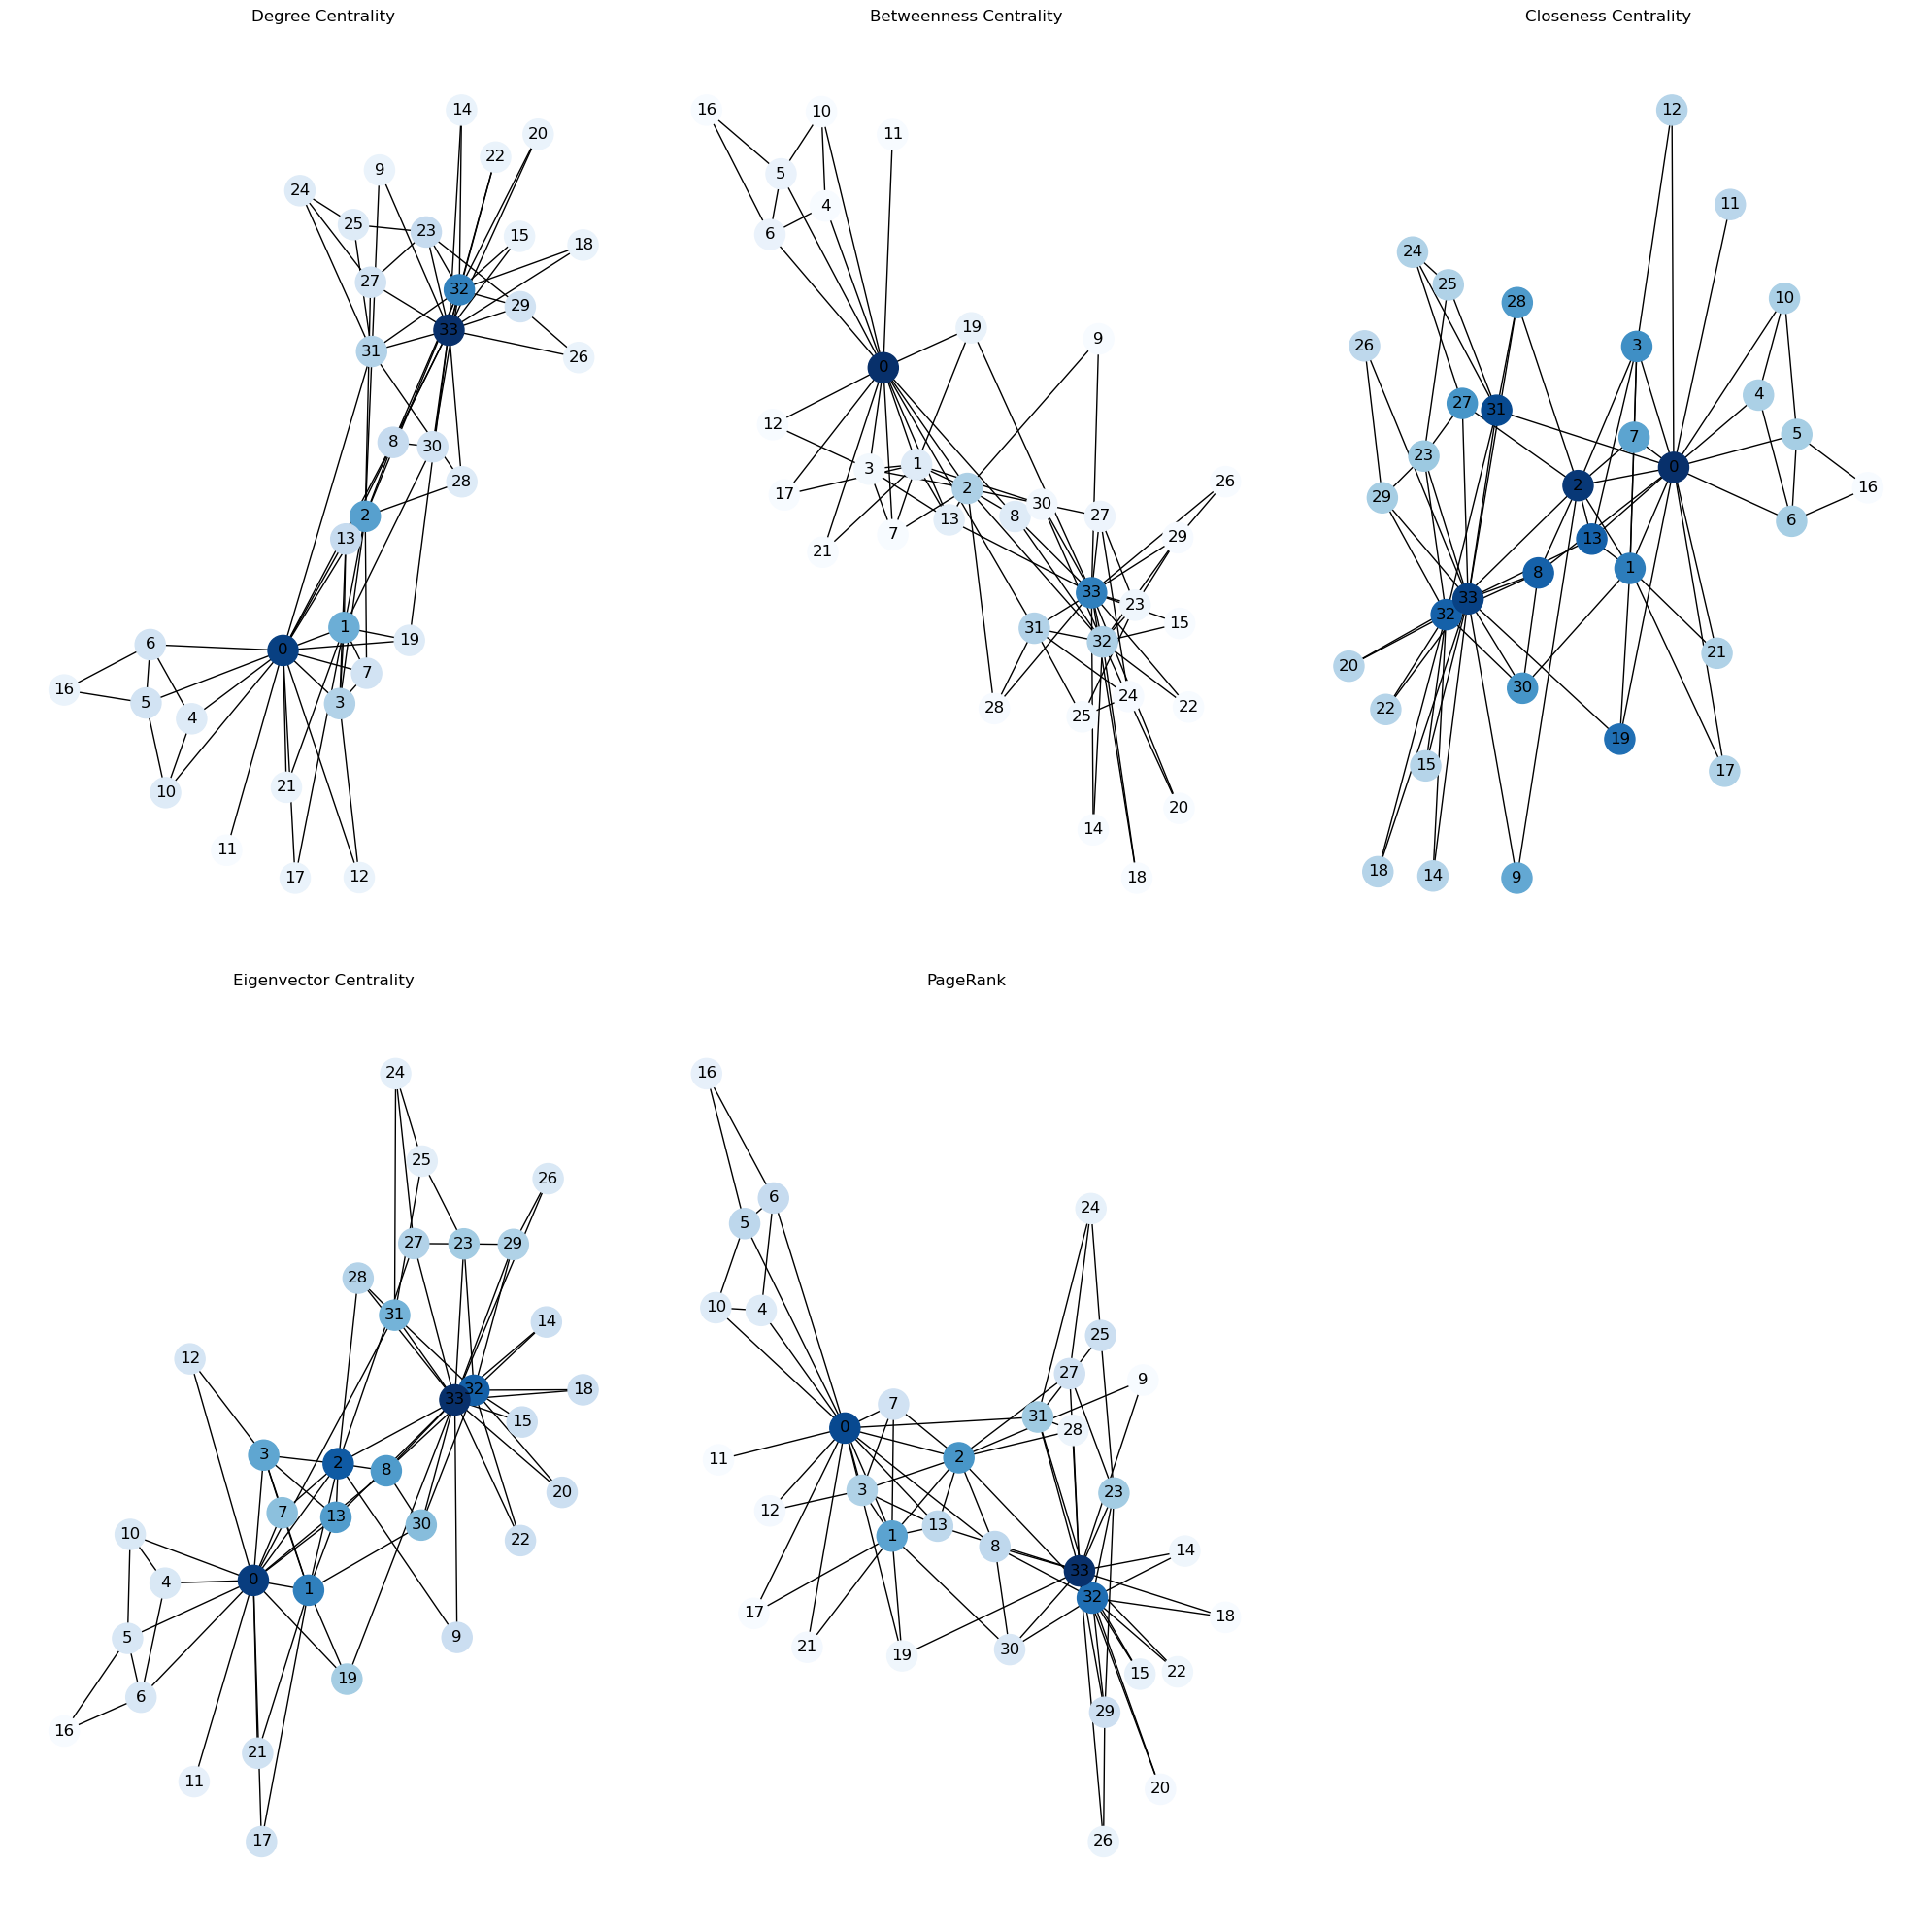

In [22]:
'''
This script generates a subplot for each centrality measure, where nodes are colored according to their centrality. 
The darker the node, the higher its centrality.
'''

# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

# Create a figure
plt.figure(figsize=(20,20))

# Degree Centrality
plt.subplot(231)
nx.draw(G, with_labels=True, node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('Degree Centrality')

# Betweenness Centrality
plt.subplot(232)
nx.draw(G, with_labels=True, node_color=list(betweenness_centrality.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('Betweenness Centrality')

# Closeness Centrality
plt.subplot(233)
nx.draw(G, with_labels=True, node_color=list(closeness_centrality.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('Closeness Centrality')

# Eigenvector Centrality
plt.subplot(234)
nx.draw(G, with_labels=True, node_color=list(eigenvector_centrality.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('Eigenvector Centrality')

# PageRank
plt.subplot(235)
nx.draw(G, with_labels=True, node_color=list(pagerank.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('PageRank')

plt.tight_layout()
plt.show()


**Plot**: While comparing above plots, we can notice that the nodes with high degree centrality also tend to have high betweenness centrality, as they serve as bridges between other nodes. Meanwhile, PageRank might highlight different nodes, as it takes into account the quality of the connections, not just their quantity.

### Coreness 

The "**coreness**" of a node refers to the "k-core" it belongs to in a network. The k-core is a concept in graph theory where it's defined as a maximal subgraph in which each node is connected to at least k other nodes in the subgraph.

The coreness of a node is then k if it belongs to the k-core but not to the (k+1)-core. So, if a node belongs to the 3-core but not to the 4-core, its coreness is 3.

Lets undestand coreness by taking the Karate Club Network, for that, lets visualize the coreness by coloring the nodes according to their coreness, with darker nodes having higher coreness.

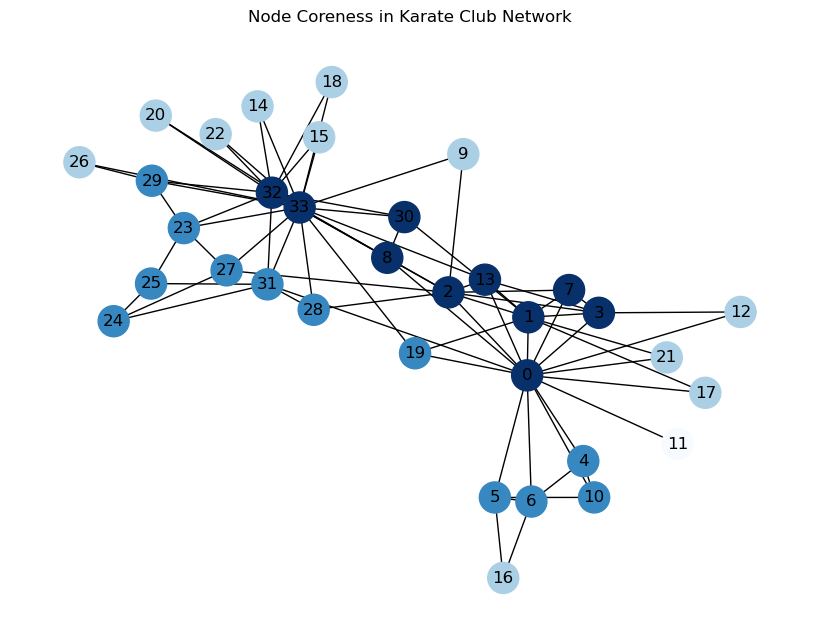

In [23]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the core number for each node
core_number = nx.core_number(G)

# Visualize the graph
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color=list(core_number.values()), cmap=plt.cm.Blues, node_size=500)
plt.title('Node Coreness in Karate Club Network')
plt.show()


**Plote**: In this visualization, nodes are colored according to their coreness, with darker nodes having higher coreness. As the coreness is related to the connectivity of the node and its neighbors, nodes with high coreness are typically found at the center of the graph.

**Note**:
- The nodes with high coreness are more central to the network and usually form the "core" of the network, as their removal would result in a more fragmented or disconnected network. On the other hand, nodes with low coreness are more peripheral and their removal would have less impact on the overall connectivity of the network.

- This measure of coreness can provide valuable insights into the structure and resilience of a network, revealing nodes that are crucial for maintaining network connectivity and could be important targets or hubs in various contexts, such as social networks, biological networks, or information networks.

# 3: Clustering 

In Network Science, "**clustering**" often refers to the tendency of nodes to create tightly knit groups, characterized by a relatively high density of ties. It is a measure of the degree to which nodes in a graph tend to cluster together.

- **Clustering Coefficient**: This metric was designed to measure the degree to which nodes in a network cluster together. It was introduced by Watts and Strogatz as a measure of local clustering of nodes. For a given node, it's defined as the proportion of possible triangles that exist through that node. More formally, for a node $i$, if $ki$ is the degree of node $i$, there are $$ki(ki - 1) / 2$$ possible links between the neighbours of node i. If $Ci$ is the number of actual links, the local clustering coefficient of node $i$ is $$Ci / [ki(ki - 1) / 2]$$



- **Transitivity**: This is the global version of the clustering coefficient. It is the ratio of 'triangles to triplets' in the network (a triplet consists of three nodes connected by either two (open triplet) or three (closed triplet, triangle) undirected ties). Hence, Transitivity = 3 * Number of Triangles / Number of Triplets. While Clustering Coefficient is a measure of local clustering, Transitivity is a measure of overall network clustering.

In [25]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the average clustering coefficient
avg_clustering_coef = nx.average_clustering(G)
print(f'Average Clustering Coefficient: {avg_clustering_coef}')

# Compute the transitivity
transitivity = nx.transitivity(G)
print(f'Transitivity: {transitivity}')


Average Clustering Coefficient: 0.5706384782076823
Transitivity: 0.2556818181818182


Above, The average_clustering function computes the average clustering coefficient of the graph, which gives an indication of the overall tendency of nodes to form clusters or tightly knit communities. The transitivity function computes the ratio of triangles to triplets in the graph, which can be seen as a measure of the overall tendency of nodes to form connected triple.

**Example**: Lets compare three well-known networks!

In [26]:
# Number of nodes and average degree
n = 100
k = 10

# (1) Erdos-Renyi Random Network
G_er = nx.erdos_renyi_graph(n, p=k/(n-1)) # p is set to give the desired average degree
print(f"Erdos-Renyi Random Network: Average Clustering Coefficient = {nx.average_clustering(G_er)}")

# (2) Watts-Strogatz Small-World Network
G_ws = nx.watts_strogatz_graph(n, k, p=0.1) # p is the probability of rewiring an edge
print(f"Watts-Strogatz Small-World Network: Average Clustering Coefficient = {nx.average_clustering(G_ws)}")

# (3) Barabasi-Albert Scale-Free Network
G_ba = nx.barabasi_albert_graph(n, int(k/2)) # the second argument is the number of edges to attach from a new node to existing nodes
print(f"Barabasi-Albert Scale-Free Network: Average Clustering Coefficient = {nx.average_clustering(G_ba)}")


Erdos-Renyi Random Network: Average Clustering Coefficient = 0.09165618445881597
Watts-Strogatz Small-World Network: Average Clustering Coefficient = 0.512591575091575
Barabasi-Albert Scale-Free Network: Average Clustering Coefficient = 0.2191480094857704


Erdos-Renyi random networks tend to have low clustering coefficients, as edges are distributed randomly and independently.

Watts-Strogatz small-world networks are designed to have high clustering coefficients and short average path lengths due to their ring lattice structure and random rewiring of edges.

Barabasi-Albert scale-free networks have clustering coefficients that may vary widely, depending on the specific parameters of the network, as they grow according to preferential attachment, which can lead to high clustering for certain nodes (hubs) and low clustering for others.

# 4: Degree Distribution

Degree distribution is a fundamental metric in network science that characterizes the number of links a node in a network has, also known as its degree.


Let's compute the degree distribution for the Karate Club network and plot a histogram

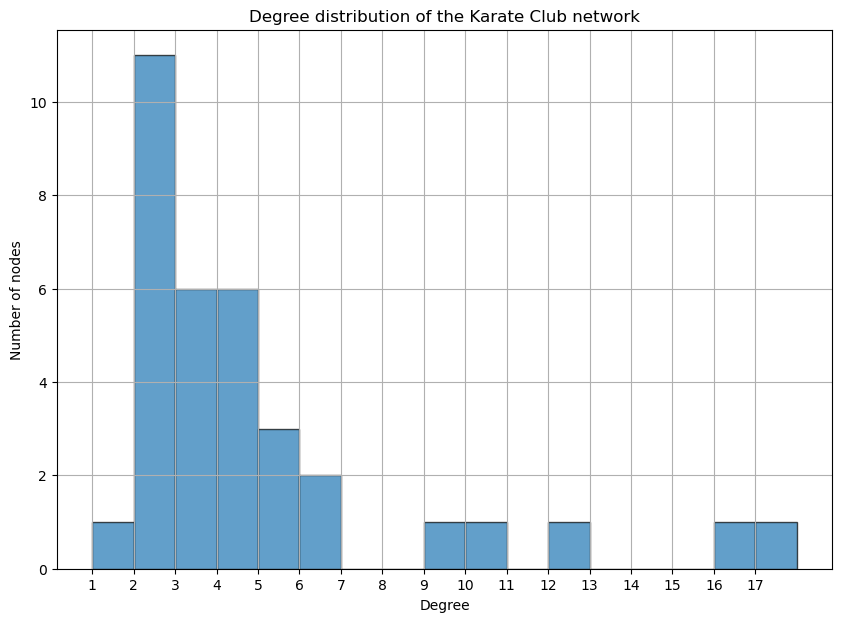

In [27]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Compute the degree of each node
degrees = [G.degree(n) for n in G.nodes()]

# Plot the histogram of degrees
plt.figure(figsize=(10, 7))
plt.hist(degrees, bins=range(1, max(degrees) + 2), edgecolor='black', alpha=0.7)
plt.xticks(range(1, max(degrees) + 1))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of the Karate Club network')
plt.grid(True)
plt.show()


**Comparision**: let's compare the degree distributions of these three types of networks. Lets generate the networks to have approximately the same number of nodes and edges for a fair comparison.

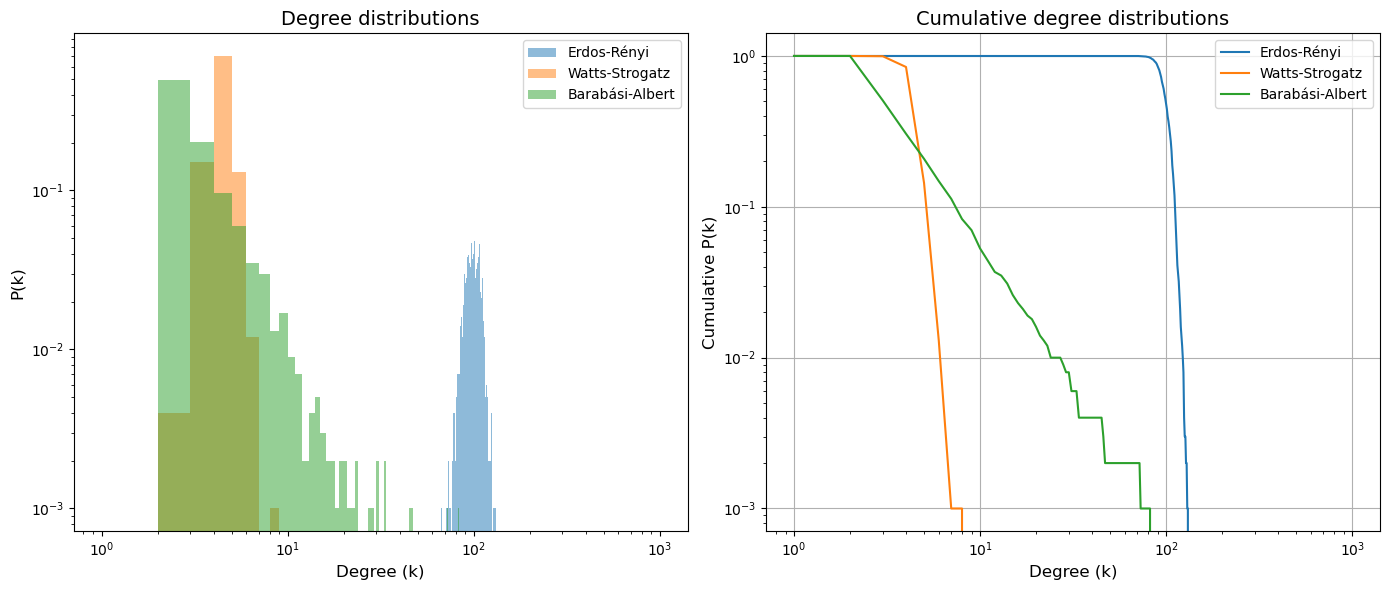

In [32]:
# Number of nodes
n = 1000

# Erdos-Rényi network parameters
p_er = 0.1

# Watts-Strogatz network parameters
k_ws = 4
p_ws = 0.1

# Barabási-Albert network parameters
m_ba = 2

# Create the networks
er = nx.erdos_renyi_graph(n, p_er)
ws = nx.watts_strogatz_graph(n, k_ws, p_ws)
ba = nx.barabasi_albert_graph(n, m_ba)

# Compute the degree distributions
degrees_er = [d for n, d in er.degree()]
degrees_ws = [d for n, d in ws.degree()]
degrees_ba = [d for n, d in ba.degree()]

# Calculate and plot the cumulative degree distributions
plt.figure(figsize=(14, 6))

# Degree Distribution Plot
plt.subplot(121)
plt.hist(degrees_er, bins=range(1, n + 1), density=True, alpha=0.5, label='Erdos-Rényi')
plt.hist(degrees_ws, bins=range(1, n + 1), density=True, alpha=0.5, label='Watts-Strogatz')
plt.hist(degrees_ba, bins=range(1, n + 1), density=True, alpha=0.5, label='Barabási-Albert')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('P(k)', fontsize=12)
plt.title('Degree distributions', fontsize=14)
plt.legend()

# Cumulative Degree Distribution Plot
plt.subplot(122)
for degrees, label in zip([degrees_er, degrees_ws, degrees_ba], ['Erdos-Rényi', 'Watts-Strogatz', 'Barabási-Albert']):
    hist, bins = np.histogram(degrees, bins=range(1, n + 2), density=True)
    cum_hist = np.cumsum(hist[::-1])[::-1]
    plt.plot(bins[:-1], cum_hist, label=label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('Cumulative P(k)', fontsize=12)
plt.title('Cumulative degree distributions', fontsize=14)
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


**Plot**:

In the plot, you will see that the degree distribution for the Erdos-Rényi graph is more centered around a mean value (indicating a more homogeneous degree distribution), the Watts-Strogatz graph degree distribution is slightly skewed, while the Barabási-Albert graph has a heavy-tailed distribution (indicating a more heterogeneous degree distribution with few nodes having a high degree, also known as hubs). This reflects the characteristic that Barabási-Albert networks follow a power-law degree distribution, a key feature of scale-free networks.

# 5: Assortativity

Assortativity in network science refers to a bias in favor of connections between network nodes with similar characteristics. In the simplest case, these characteristics can be the nodes' degrees.

- **Assortativity (positive assortativity)**: In the context of network theory, assortativity means that nodes in a network are connected to other nodes with a similar degree. This can be interpreted as 'popular nodes' tending to connect with other 'popular nodes'.

- **Disassortativity (negative assortativity)**: Disassortativity is the opposite, it means that nodes tend to connect with nodes that have dissimilar degree. This might mean that 'popular nodes' are more likely to connect with less popular ones.

- **Assortativity coefficient**: The assortativity coefficient is a number between -1 and 1 that measures the correlation between the degrees of all nodes on two opposite ends of a link. A positive number indicates a correlation between nodes of similar degree, while a negative number indicates a correlation between nodes of different degrees. A value of 0 indicates no correlation.

Let's calculate the assortativity coefficient of the Karate Club network using NetworkX's degree_assortativity_coefficient function.

In [33]:
# Create the network
G = nx.karate_club_graph()

# Compute the assortativity coefficient
r = nx.degree_assortativity_coefficient(G)

print(f"Assortativity coefficient: {r}")


Assortativity coefficient: -0.47561309768461413
